The following script is made to design a Neural Network from scratch (without any libraries)

necessary imports...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%run not_main.ipynb

/tmp/ipykernel_5956/3853983104.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/adavid/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Q1.1: Compute loss and gradient w.t.r W,b

In [97]:
def softmax_regression_loss(X, Y, W, b):
    """
    Compute the loss function for soft-max regression.

    Parameters:
    - X: Input data matrix of shape (num_features, num_samples)
    - Y: True labels matrix of shape (num_classes, num_samples)
    - W: Weight matrix of shape (num_features, num_classes)
    - b: Bias vector of shape (num_classes,)

    Returns:
    - loss: Scalar value representing the loss
    - dw: Gradient of the loss with respect to W
    - db: Gradient of the loss with respect to b
    - dx: Gradient of the loss with respect to X
    """
    num_samples = X.shape[1]
    num_features = X.shape[0]
    num_classes = Y.shape[0]

    #calculate the value of the linear multiplication with normalization:
    linear_calc = np.dot(X.T, W) + b.reshape(1,-1)
    max_col = np.max(linear_calc, axis=1).reshape(-1,1)
    linear_norm = linear_calc - max_col
    #compute the softmax function:
    linear_norm_exp = np.exp(linear_norm)
    softmax = linear_norm_exp / np.sum(linear_norm_exp, axis=1).reshape(-1,1)

    #compute loss:
    log_softmax = np.log(softmax)
    #replace loss_unnorm with a vector with each entry being the inner multiplication of each column of Y with the corresponding column of log_softmax:
    loss_unnorm = Y*log_softmax.T
    loss = -np.sum(np.sum(loss_unnorm, axis=0)) / num_samples

    #compute gradients:
    dsoftmax = softmax - Y.T
    dw = np.dot(X, dsoftmax) / num_samples
    db = np.sum(dsoftmax, axis=0) / num_samples

    #gradient w.t.r to X:
    dx = np.dot(W, softmax.T - Y) / num_samples


    return loss, dw, db, dx


    




Q1.1: test the func above with Jacobian and Gradient test

In [98]:
def softmax_regression_loss_verification(X,W,Y,b,d,epsilons):

    losses_ord1 = []
    losses_ord2 = []
    for epsilon in epsilons:
        
        # increment W by epsilon:
        eps_d = np.array(epsilon*d)
        X_plus = X.copy() + eps_d
        loss_plus, _, _, _ = softmax_regression_loss(X_plus, Y, W, b)
        loss, _,_, dx = softmax_regression_loss(X, Y, W, b)
        loss_ord1 = loss_plus - loss
        loss_ord2 = loss_ord1 - np.sum(np.multiply(eps_d, dx))
        loss_ord1_abs = np.abs(loss_ord1)
        loss_ord2_abs = np.abs(loss_ord2)
        losses_ord1.append(loss_ord1_abs)
        losses_ord2.append(loss_ord2_abs)

    #plot the results:
    plt.plot(epsilons, losses_ord1, label='First Order - O(\u03B5)')
    plt.plot(epsilons, losses_ord2, label='Second Order - O(\u03B5^2)')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Epsilon')
    plt.ylabel('Loss')
    plt.title('Gradient Verification - Log Scale')
    plt.legend()
    plt.show()
    

    


In [99]:
def generate_random_parameters_for_test(): 
    # Generate random X, Y, W, b, epsilons, d matching the dimensions in the above function signature:
    num_features = 5
    num_classes = 3
    num_samples = 10
    X = np.random.rand(num_features, num_samples)
    W = np.random.rand(num_features, num_classes)
    b = np.random.rand(num_classes,1)
    #set Y to a random matrix with 1s in the correct class and 0s elsewhere:
    Y = np.zeros((num_classes, num_samples))
    for i in range(num_samples):
        Y[np.random.randint(0, num_classes), i] = 1
    # create a decending array of epsilon values:
    epsilons = np.array([(0.5)**i for i in range(1, 10)])
    # create random vector d that should hold ||d|| = O(1):
    d = np.random.rand(num_features, num_samples)
    return X,W,Y,b,d,epsilons

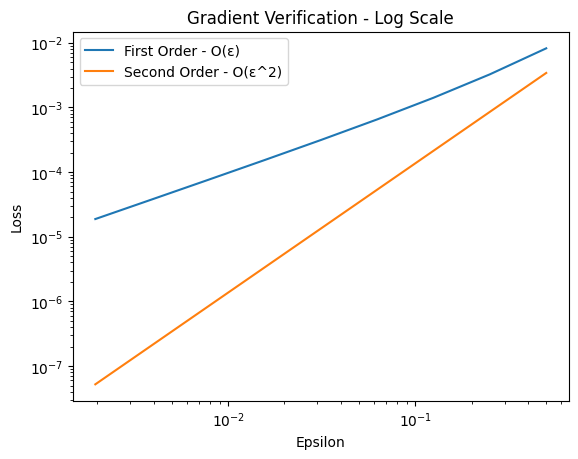

In [100]:
softmax_regression_loss_verification(*generate_random_parameters_for_test())

In [91]:
def sgd(X, W, Y, b, alpha = 0.1, num_iterations = 10000):

    losses = []
    for i in range(num_iterations):
        loss, dw, db, _ = softmax_regression_loss(X, Y, W, b)
        print (f"SGD iteration: {i}. Loss = {loss}")
        losses.append(loss)
        W -= alpha*dw
        b -= alpha*db.reshape(-1,1)
    return W, b, losses

In [ ]:
X,W,Y,b,_,_ = generate_random_parameters_for_test()
X,b,loss = sgd(X,W,Y,b, num_iterations=100000)

In [5]:
not_main.do_nothing()

NameError: name 'not_main' is not defined